# Projeto Desvio Padrão Setorial: análise comparativa entre ações da bolsa de valores brasileira

<b>Ao selecionar ativos de um mesmo setor com correlações e desvios padrão (medida de volatilidade) opostos para compor carteiras de investimentos distintas,  é possível aumentar as probabilidades de lucro e diminuir as taxas de drawdown (período de baixa performance e maior prejuízo financeiro de um sistema)?
Para responder a este questionamento, criei 3 carteiras de ações pertencentes a um mesmo setor: 1. ações com desvio  padrão diário maior, 2.ações com desvio padrão diário menor e 3.ações que apresentaram correlações opostas (altas e baixas) com o  índice Bovespa (Ibov). Comparei os retornos e drawdowns máximos destas carteiras entre 01/01/2015 e 01/01/2020, sempre considerando o índice IBOV como benchmark.<b>

In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt

<b>Carregando ativos de um mesmo setor (setor financeiro: indice IFNC): preços de fechamento e desvios padrão<b>

In [2]:
Ativos = wb.DataReader(['ABCB4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BIDI4.SA', 'BIDI11.SA',
                           'BMGB4.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRSR6.SA', 'CIEL3.SA', 'ITSA4.SA', 'ITUB4.SA', 'PSSA3.SA',
                          'SANB11.SA', 'SULA11.SA'], data_source='yahoo', start='01-01-2015', end='01-01-2020')['Close']
Ativos.head(3)

Symbols,ABCB4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BIDI4.SA,BIDI11.SA,BMGB4.SA,BPAC11.SA,BPAN4.SA,BRSR6.SA,CIEL3.SA,ITSA4.SA,ITUB4.SA,PSSA3.SA,SANB11.SA,SULA11.SA
Date,,,,,,,,,,,,,,,,,,
2015-01-02,9.520119,9.51,22.65,16.134476,16.269001,30.350000,NaN,NaN,NaN,NaN,2.30,14.30,22.986111,6.828494,18.639118,31.000000,12.72,10.317934
2015-01-05,9.444261,9.25,22.18,15.926837,16.292715,29.440001,NaN,NaN,NaN,NaN,2.16,14.20,22.204861,6.850834,18.732782,30.940001,12.63,10.105805
2015-01-06,9.216689,9.34,22.49,16.351551,16.828691,30.690001,NaN,NaN,NaN,NaN,2.15,13.09,21.759258,6.902959,19.035812,30.549999,12.72,9.859736


In [3]:
desv_padrao = Ativos.std()
desv_padrao

Symbols
ABCB4.SA      4.088176
B3SA3.SA     10.152507
BBAS3.SA     11.348313
BBDC3.SA      5.190694
BBDC4.SA      6.572613
BBSE3.SA      3.055430
BIDI4.SA      9.955929
BIDI11.SA     6.750905
BMGB4.SA      0.510579
BPAC11.SA    16.783287
BPAN4.SA      2.399167
BRSR6.SA      5.691751
CIEL3.SA      7.447303
ITSA4.SA      2.425054
ITUB4.SA      6.933354
PSSA3.SA     11.261401
SANB11.SA    11.423642
SULA11.SA    10.326702
dtype: float64

<b>Calculando Desempenho Carteiras<b>

<b>Carteira desvio padrão maior: Retorno e Drawdown<b>

In [4]:
import seaborn as sns

In [5]:
dp_maior = wb.DataReader(['BPAC11.SA', 'SANB11.SA','BBAS3.SA', 'PSSA3.SA', '^BVSP'], data_source='yahoo', 
                               start='01-01-2015', end='01-01-2020')['Close']
dp_maior.head(2)

Symbols,BPAC11.SA,SANB11.SA,BBAS3.SA,PSSA3.SA,^BVSP
Date,,,,,
2015-01-02,NaN,12.72,22.65,31.000000,48512.0
2015-01-05,NaN,12.63,22.18,30.940001,47517.0


Retorno - carteira dpmaior

In [6]:
Retorno_dpmaior = dp_maior.pct_change()
Retorno_dpmaior.head(4)

Symbols,BPAC11.SA,SANB11.SA,BBAS3.SA,PSSA3.SA,^BVSP
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,-0.007075,-0.020751,-0.001935,-0.020510
2015-01-06,NaN,0.007126,0.013977,-0.012605,0.010186
2015-01-07,NaN,0.041667,0.044020,0.001637,0.030458


<AxesSubplot:xlabel='Date'>

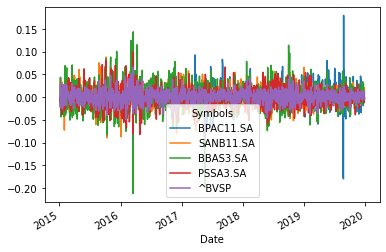

In [7]:
Retorno_dpmaior.plot()

In [8]:
Retorno_dpmaior.mean()*250*100

Symbols
BPAC11.SA    57.921590
SANB11.SA    33.175102
BBAS3.SA     26.623028
PSSA3.SA     19.270023
^BVSP        19.973831
dtype: float64

In [9]:
retorno_acumulado_dpmaior=(1+Retorno_dpmaior).cumprod()
retorno_acumulado_dpmaior.iloc[0]=1
retorno_acumulado_dpmaior.head(4)

Symbols,BPAC11.SA,SANB11.SA,BBAS3.SA,PSSA3.SA,^BVSP
Date,,,,,
2015-01-02,1.0,1.000000,1.000000,1.000000,1.000000
2015-01-05,NaN,0.992925,0.979249,0.998065,0.979490
2015-01-06,NaN,1.000000,0.992936,0.985484,0.989467
2015-01-07,NaN,1.041667,1.036645,0.987097,1.019603


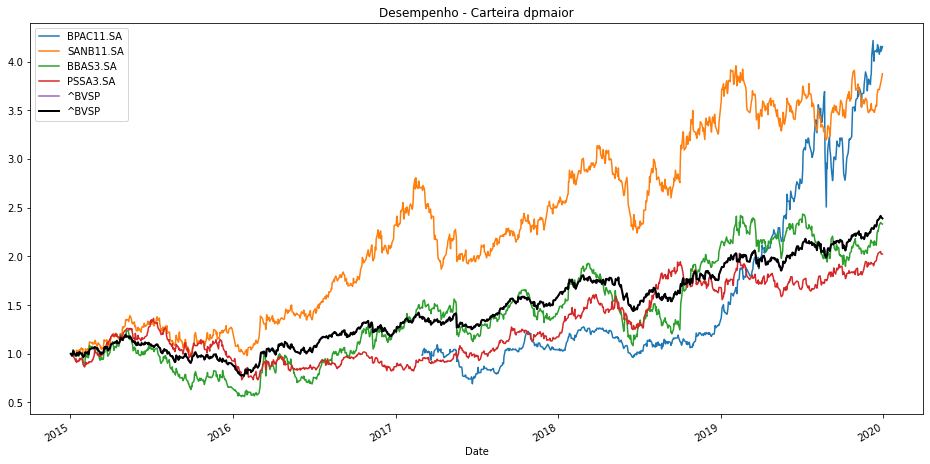

In [10]:
retorno_acumulado_dpmaior.plot(figsize=(16,8), title='Desempenho - Carteira dpmaior')
retorno_acumulado_dpmaior['^BVSP'].plot(linewidth=2, color='black')   
plt.legend()
plt.show()

Maximo drawdown - carteira dpmaior

In [11]:
r = Retorno_dpmaior.add(1).cumprod()
dd = r.div(r.cummax()).sub(1)
mdd= dd.min()
mdd

Symbols
BPAC11.SA   -0.366516
SANB11.SA   -0.334174
BBAS3.SA    -0.547398
PSSA3.SA    -0.462740
^BVSP       -0.354079
dtype: float64

In [12]:
mdd.mean()*100   #media % drawdown carteira dpmaior

-41.2981312006054

<b>Carteira desvio padrao menor: Retorno e Drawdown<b>

In [13]:
dp_menor = wb.DataReader(['BPAN4.SA', 'BBSE3.SA','ITSA4.SA', 'ABCB4.SA', '^BVSP'], data_source='yahoo', 
                               start='01-01-2015', end='01-01-2020')['Close']
dp_menor.head(2)

Symbols,BPAN4.SA,BBSE3.SA,ITSA4.SA,ABCB4.SA,^BVSP
Date,,,,,
2015-01-02,2.30,30.350000,6.828494,9.520119,48512.0
2015-01-05,2.16,29.440001,6.850834,9.444261,47517.0


Retorno - carteira dpmenor

In [14]:
Retorno_dpmenor = dp_menor.pct_change()
Retorno_dpmenor.head(4)

Symbols,BPAN4.SA,BBSE3.SA,ITSA4.SA,ABCB4.SA,^BVSP
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.060870,-0.029984,0.003272,-0.007968,-0.020510
2015-01-06,-0.004630,0.042459,0.007609,-0.024096,0.010186
2015-01-07,-0.004651,-0.015966,0.037756,-0.019753,0.030458


<AxesSubplot:xlabel='Date'>

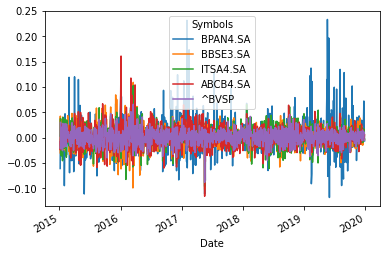

In [15]:
Retorno_dpmenor.plot()

In [16]:
Retorno_dpmenor.mean()*250*100

Symbols
BPAN4.SA    43.567172
BBSE3.SA     9.309453
ITSA4.SA    18.895759
ABCB4.SA    20.142286
^BVSP       19.973831
dtype: float64

In [17]:
retorno_acumulado_dpmenor=(1+Retorno_dpmenor).cumprod()
retorno_acumulado_dpmenor.iloc[0]=1
retorno_acumulado_dpmenor.head(3)

Symbols,BPAN4.SA,BBSE3.SA,ITSA4.SA,ABCB4.SA,^BVSP
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.939130,0.970016,1.003272,0.992032,0.979490
2015-01-06,0.934783,1.011203,1.010905,0.968128,0.989467


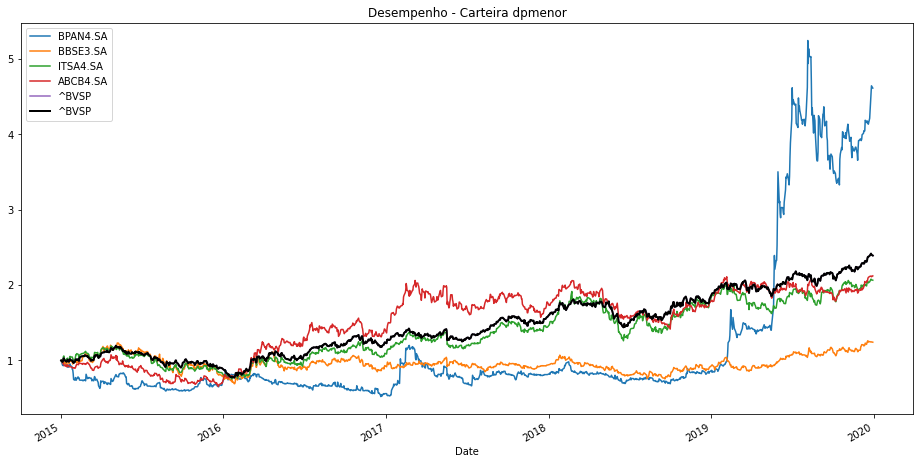

In [18]:
retorno_acumulado_dpmenor.plot(figsize=(16,8), title='Desempenho - Carteira dpmenor')
retorno_acumulado_dpmenor['^BVSP'].plot(linewidth=2, color='black')   
plt.legend()
plt.show()

Max drawdown - carteira dpmenor

In [19]:
r = Retorno_dpmenor.add(1).cumprod()
dd = r.div(r.cummax()).sub(1)
mdd2 = dd.min()
mdd2

Symbols
BPAN4.SA   -0.459459
BBSE3.SA   -0.438202
ITSA4.SA   -0.366239
ABCB4.SA   -0.390012
^BVSP      -0.354079
dtype: float64

In [20]:
mdd2.mean()*100   #media % drawdown carteira dpmenor

-40.15983221976961

<b>Carteiras dpmaior e dpmenor: Correlação Ibov<b>

Correlação: Carteira dp maior x Ibov

In [21]:
dp_maior.corr(method='pearson')

Symbols,BPAC11.SA,SANB11.SA,BBAS3.SA,PSSA3.SA,^BVSP
Symbols,,,,,
BPAC11.SA,1.000000,0.728010,0.746648,0.668168,0.884767
SANB11.SA,0.728010,1.000000,0.948725,0.835718,0.967328
BBAS3.SA,0.746648,0.948725,1.000000,0.830698,0.960567
PSSA3.SA,0.668168,0.835718,0.830698,1.000000,0.880437
^BVSP,0.884767,0.967328,0.960567,0.880437,1.000000


Visualizando correlação entre ativos:

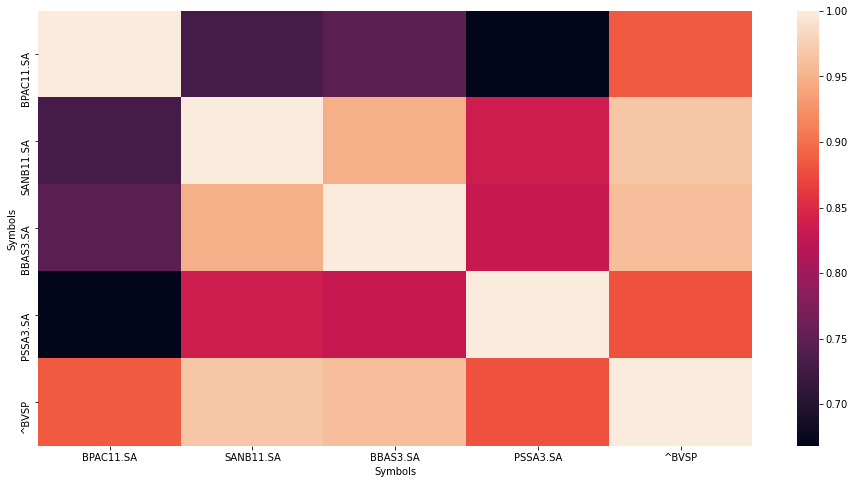

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(dp_maior.corr())
plt.show()

Correlação: Carteira dp menor x Ibov

In [23]:
dp_menor.corr()

Symbols,BPAN4.SA,BBSE3.SA,ITSA4.SA,ABCB4.SA,^BVSP
Symbols,,,,,
BPAN4.SA,1.000000,0.533155,0.639795,0.459034,0.708709
BBSE3.SA,0.533155,1.000000,0.270198,0.101423,0.267490
ITSA4.SA,0.639795,0.270198,1.000000,0.855012,0.983282
ABCB4.SA,0.459034,0.101423,0.855012,1.000000,0.853362
^BVSP,0.708709,0.267490,0.983282,0.853362,1.000000


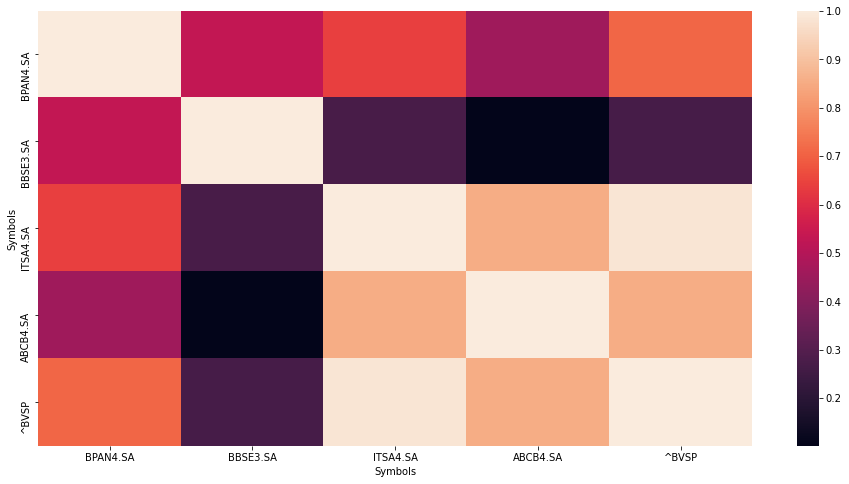

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(dp_menor.corr())
plt.show()

<b>Carteira Correlação: 2 maiores e 2 menores correlações com Ibov de todos os ativos que compoem o setor financeiro (IFNC)<b>

In [25]:
carteira_correl = wb.DataReader(['BBAS3.SA', 'SANB11.SA', 'BPAN4.SA', 'BBSE3.SA', '^BVSP'], data_source='yahoo', 
                               start='01-01-2015', end='01-01-2020')['Close']
carteira_correl.head(3)

Symbols,BBAS3.SA,SANB11.SA,BPAN4.SA,BBSE3.SA,^BVSP
Date,,,,,
2015-01-02,22.65,12.72,2.30,30.350000,48512.0
2015-01-05,22.18,12.63,2.16,29.440001,47517.0
2015-01-06,22.49,12.72,2.15,30.690001,48001.0


<b>Carteira correl: Retorno e Drawdown<b>

In [26]:
ret_carteiracorrel = carteira_correl.pct_change()
ret_carteiracorrel.tail(3)

Symbols,BBAS3.SA,SANB11.SA,BPAN4.SA,BBSE3.SA,^BVSP
Date,,,,,
2019-12-26,0.011407,0.017581,0.072314,-0.005007,0.011565
2019-12-27,-0.004323,0.005620,0.027938,0.002119,-0.005708
2019-12-30,-0.002832,0.020493,-0.006560,-0.003700,-0.004891


<AxesSubplot:xlabel='Date'>

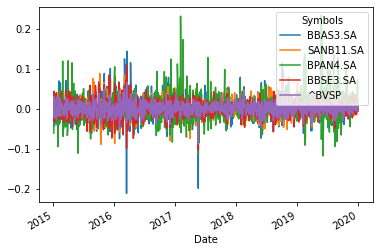

In [27]:
ret_carteiracorrel.plot()

In [28]:
ret_carteiracorrel.mean()*250*100

Symbols
BBAS3.SA     26.623028
SANB11.SA    33.175102
BPAN4.SA     43.567172
BBSE3.SA      9.309453
^BVSP        19.973831
dtype: float64

In [29]:
ret_acumulado_carteiracorrel = (1+ret_carteiracorrel).cumprod()
ret_acumulado_carteiracorrel.iloc[0]=1
ret_acumulado_carteiracorrel.head(3)

Symbols,BBAS3.SA,SANB11.SA,BPAN4.SA,BBSE3.SA,^BVSP
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.979249,0.992925,0.939130,0.970016,0.979490
2015-01-06,0.992936,1.000000,0.934783,1.011203,0.989467


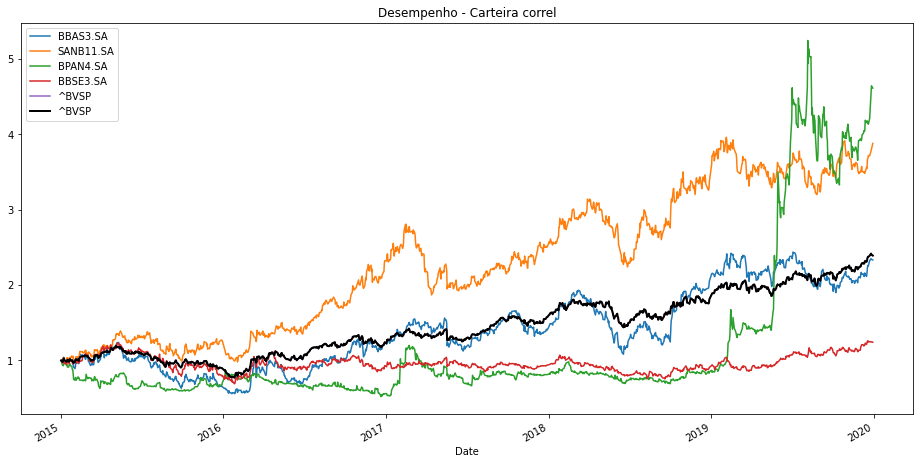

In [30]:
ret_acumulado_carteiracorrel.plot(figsize=(16,8), title='Desempenho - Carteira correl')
ret_acumulado_carteiracorrel['^BVSP'].plot(linewidth=2, color='black')   
plt.legend()
plt.show()

Max drawdown - carteira correl

In [31]:
r = ret_carteiracorrel.add(1).cumprod()
dd = r.div(r.cummax()).sub(1)
mdd3 = dd.min()
mdd3

Symbols
BBAS3.SA    -0.547398
SANB11.SA   -0.334174
BPAN4.SA    -0.459459
BBSE3.SA    -0.438202
^BVSP       -0.354079
dtype: float64

In [32]:
mdd3.mean()*100   #media % drawdown carteira dpmenor

-42.66625821350259

# RESULTADOS

<b>Comparando performance e drawdown carteiras<b>

In [33]:
#Retorno % carteira dp maior (medio anual por ativo)
Retorno_dpmaior.mean()*250*100

Symbols
BPAC11.SA    57.921590
SANB11.SA    33.175102
BBAS3.SA     26.623028
PSSA3.SA     19.270023
^BVSP        19.973831
dtype: float64

In [34]:
#Retorno % carteira dp menor (medio anual por ativo)
Retorno_dpmenor.mean()*250*100

Symbols
BPAN4.SA    43.567172
BBSE3.SA     9.309453
ITSA4.SA    18.895759
ABCB4.SA    20.142286
^BVSP       19.973831
dtype: float64

In [35]:
#Retorno % carteira correl (medio anual por ativo)
ret_carteiracorrel.mean()*250*100

Symbols
BBAS3.SA     26.623028
SANB11.SA    33.175102
BPAN4.SA     43.567172
BBSE3.SA      9.309453
^BVSP        19.973831
dtype: float64

In [36]:
#Retorno % carteira dp maior (medio anual total)
a = Retorno_dpmaior.mean()*250*100
a.sum()

156.96357404008535

In [37]:
#Retorno % carteira dp menor (medio anual total)
b = Retorno_dpmenor.mean()*250*100
b.sum()

111.88850181979541

In [38]:
#Retorno % carteira correl (medio anual total)
c = ret_carteiracorrel.mean()*250*100
c.sum()

132.64858586686154

In [39]:
#Maximo Drawdown carteira dp maior (por ativo)
mdd

Symbols
BPAC11.SA   -0.366516
SANB11.SA   -0.334174
BBAS3.SA    -0.547398
PSSA3.SA    -0.462740
^BVSP       -0.354079
dtype: float64

In [40]:
#Maximo Drawdown carteira dp menor (por ativo)
mdd2

Symbols
BPAN4.SA   -0.459459
BBSE3.SA   -0.438202
ITSA4.SA   -0.366239
ABCB4.SA   -0.390012
^BVSP      -0.354079
dtype: float64

In [41]:
#Maximo Drawdown carteira correl (por ativo)
mdd3

Symbols
BBAS3.SA    -0.547398
SANB11.SA   -0.334174
BPAN4.SA    -0.459459
BBSE3.SA    -0.438202
^BVSP       -0.354079
dtype: float64

In [42]:
#Maximo drawdown % medio carteira dpmaior
mdd.mean()*100

-41.2981312006054

In [43]:
#Maximo drawdown % medio carteira dp menor
mdd2.mean()*100

-40.15983221976961

In [44]:
#Maximo drawdown % medio carteira correl
mdd3.mean()*100

-42.66625821350259

# CONCLUSÃO

<b>Disclaimer: Retornos passados não são garantia de retorno futuro.<b>

<b>1) A carteira dpmenor apresentou o pior resultado, com retorno inferior e drawdown tecnicamente igual (ligeiramente inferior) as demais carteiras.<b>

<b>2) Nao identificamos impactos e diferenças significativas referentes taxas de drawdowns entre as tres carteiras de ações de um mesmo setor em um prazo de 5 anos.<b>  

<b>3) Para o aumento de probabilidade de retorno e redução de drawdown do portfolio e considerando o resultado em um intervalo de 5 anos, neste caso seria mais indicado escolher a carteira dpmaior como investimento, por ter apresentado métricas superiores em relação as demais carteiras.<b>

# FIM